In [3]:
bIsGoogleColab = True

In [4]:
if(bIsGoogleColab):
    !umount ./ramdisk
    !rmdir ./ramdisk/augmented
    !rmdir ./ramdisk
    !mkdir ./ramdisk
    !mount -t tmpfs -o size=5g tmpfs ./ramdisk
    !mkdir ./ramdisk/augmented
    !gdown 1vcJqO1ZChISHubGykn5hQSQGW0RecwdT
    !tar -xf archive_handwrite.tar.xz -C ./ramdisk/
else:
    !sudo -S umount ./ramdisk < ./mypassword.txt
    !rmdir ./ramdisk/augmented
    !rmdir ./ramdisk
    !mkdir ./ramdisk
    !sudo -S mount -t tmpfs -o size=5g tmpfs ./ramdisk < ./mypassword.txt
    !mkdir ./ramdisk/augmented
    !cp -r archive_handwrite ./ramdisk

[sudo] password for hu: rmdir: failed to remove './ramdisk/augmented': No such file or directory
[sudo] password for hu: 

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
base_dir = './ramdisk/archive_handwrite'
train_dir = os.path.join(base_dir,'Train')
test_dir = os.path.join(base_dir, 'Test')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 15,
							width_shift_range = 0.1,
							height_shift_range = 0.1,
							shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = False,)

In [58]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
                            color_mode="grayscale",
							target_size = (32, 32),
							batch_size = 1,
							class_mode ='categorical',
							)




Found 834036 images belonging to 39 classes.


<Figure size 640x480 with 0 Axes>

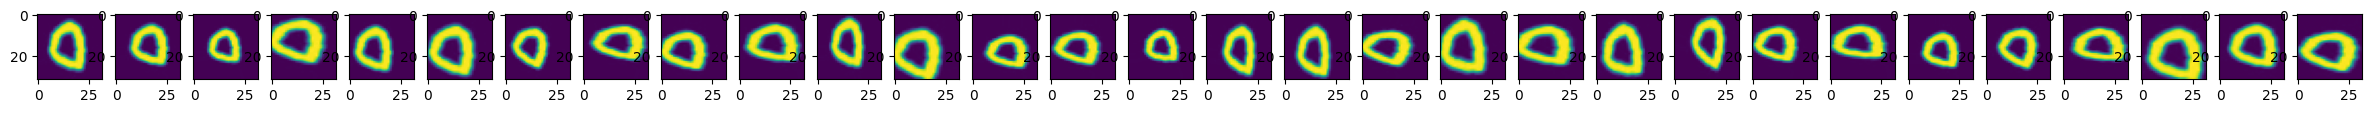

In [59]:
plt.figure()

image_num = 30

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, image_num, figsize=(30, 8)) 

for i in range(image_num) :
  axarr[i].imshow(train_generator[40][0][0])

In [61]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (32, 32),
							batch_size = 8,
							class_mode ='categorical',
                            color_mode="grayscale",
							save_to_dir= './ramdisk/augmented',   
              save_prefix='aug',
              save_format='png'
							)

Found 834036 images belonging to 39 classes.


In [62]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (32,32,1)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(39,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 10)        100       
                                                                 
 flatten_4 (Flatten)         (None, 9000)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2304256   
                                                                 
 dense_9 (Dense)             (None, 39)                10023     
                                                                 
Total params: 2,314,379
Trainable params: 2,314,379
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(
						train_generator, 
						epochs = 10)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

Epoch 1/10


2023-05-16 19:56:57.786065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 24052/104255 [=====>........................] - ETA: 16:34 - loss: 0.0902 - acc: 0.3684

KeyboardInterrupt: 